In [102]:
import sklearn.datasets
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, Isomap

In [4]:
import umap.plot

In [83]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=y)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=y)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data, s=100)
    plt.title(title, fontsize=18)

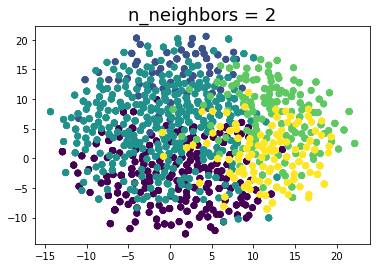

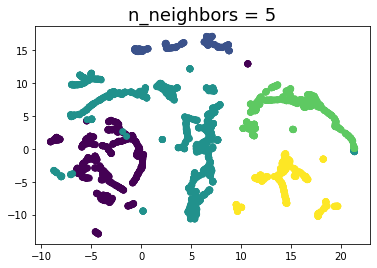

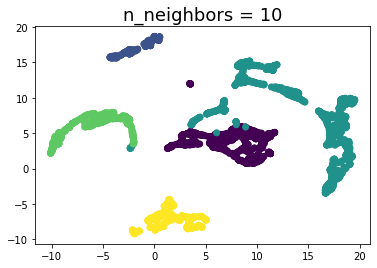

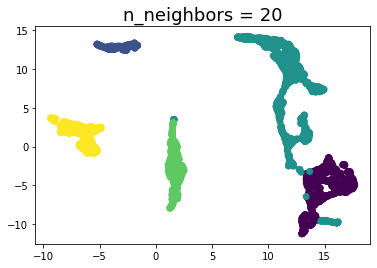

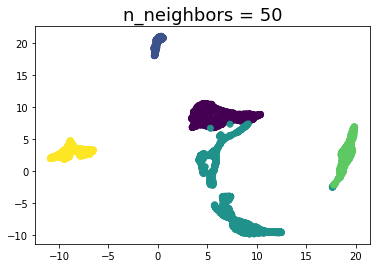

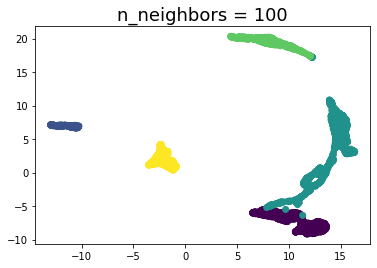

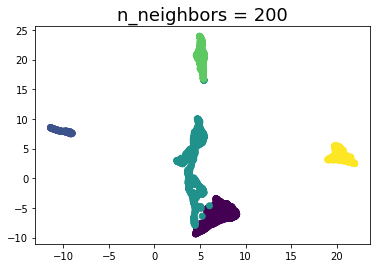

In [84]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

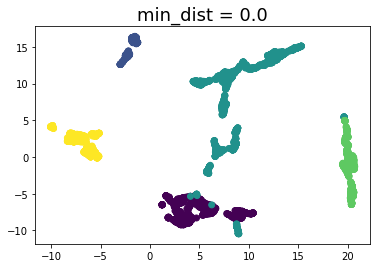

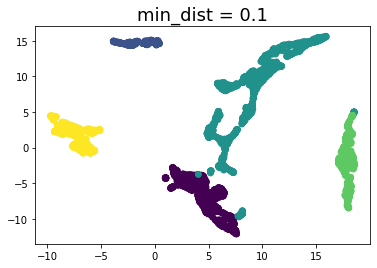

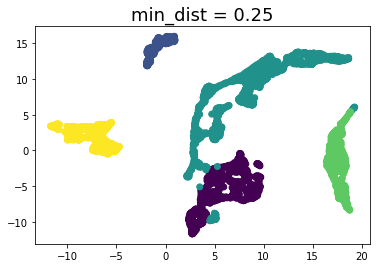

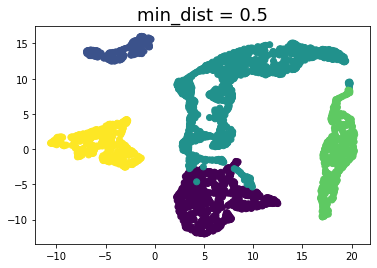

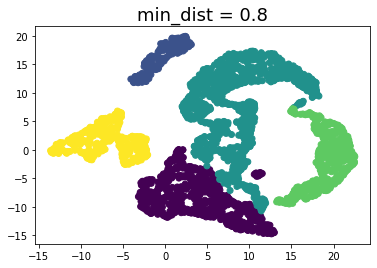

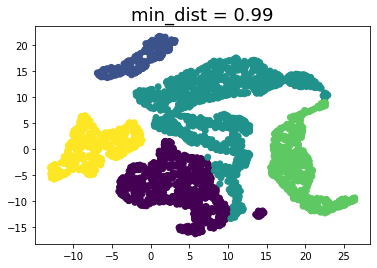

In [94]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))


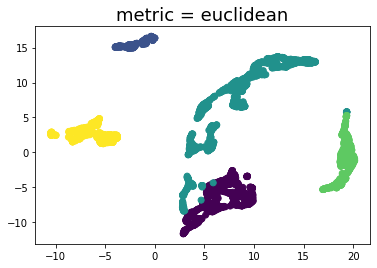

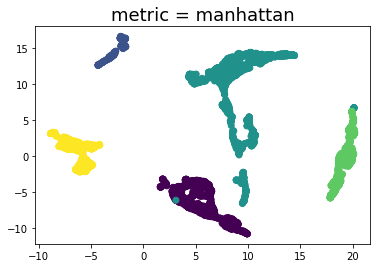

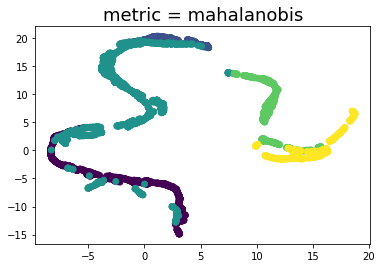

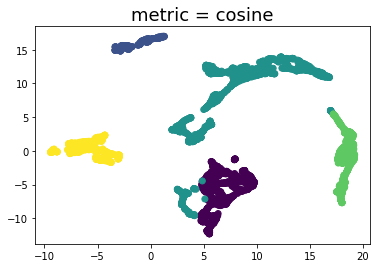

In [98]:
for m in ("euclidean", "manhattan", "mahalanobis", "cosine"):
    name = m if type(m) is str else m.__name__
    draw_umap(n_components=2, metric=m, title='metric = {}'.format(name))

In [ ]:
data = pd.read_csv("world_data/rawdata_world_3d.csv")
print(f"data shape: {data.shape}")
y = data["y"]

data.drop(["y"], axis=1, inplace=True)
reducer = umap.UMAP(n_neighbors=20, n_components=2)
mapper = reducer.fit(data)

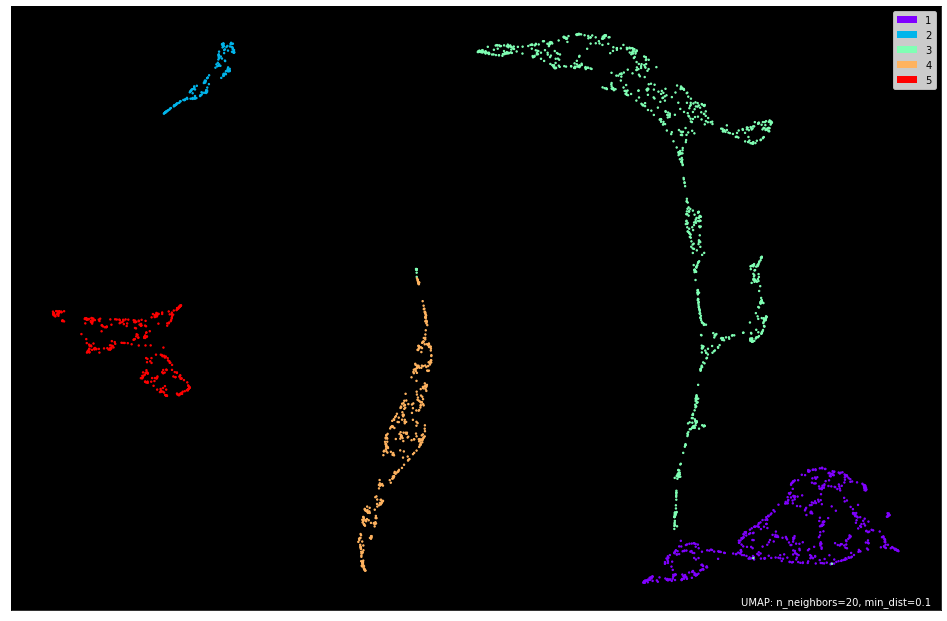

In [80]:
umap.plot.points(mapper, labels=y, theme='fire', width=1200, height=800)


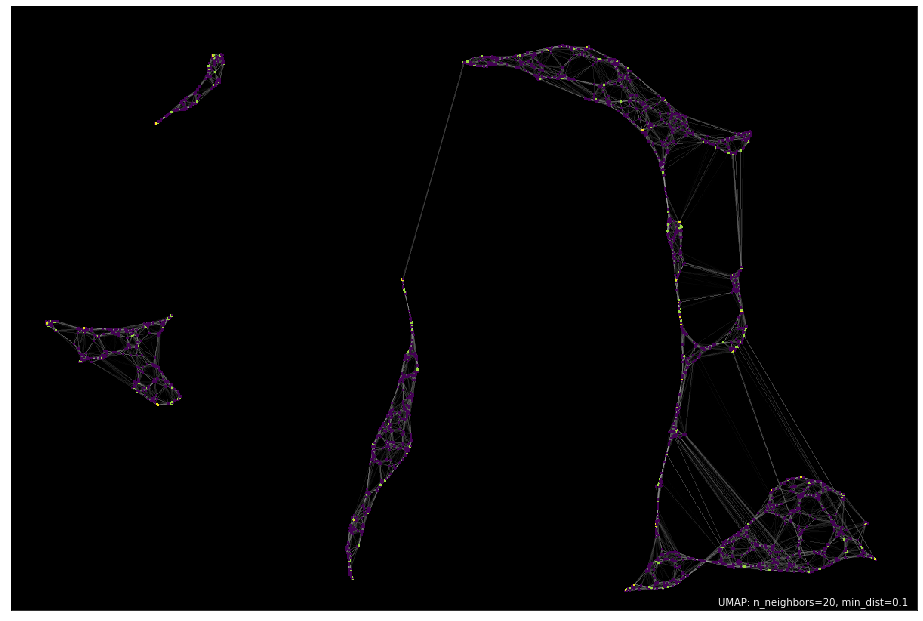

In [99]:
umap.plot.connectivity(mapper, show_points=True, theme="viridis", width=1200, height=800)

In [44]:
help(umap.plot)

Help on module umap.plot in umap:

NAME
    umap.plot

FUNCTIONS
    connectivity(umap_object, edge_bundling=None, edge_cmap='gray_r', show_points=False, labels=None, values=None, theme=None, cmap='Blues', color_key=None, color_key_cmap='Spectral', background='white', width=800, height=800)
        Plot connectivity relationships of the underlying UMAP
        simplicial set data structure. Internally UMAP will make
        use of what can be viewed as a weighted graph. This graph
        can be plotted using the layout provided by UMAP as a
        potential diagnostic view of the embedding. Currently this only works
        for 2D embeddings. While there are many optional parameters
        to further control and tailor the plotting, you need only
        pass in the trained/fit umap model to get results. This plot
        utility will attempt to do the hard work of avoiding
        overplotting issues and provide options for plotting the
        points as well as using edge bundling

In [55]:
p = umap.plot.interactive(mapper, labels=y, point_size=4, theme="inferno")
umap.plot.show(p)

In [128]:
pendigits = sklearn.datasets.load_digits()

In [129]:
X_tsne = TSNE().fit_transform(pendigits.data)
X_tsne.shape

(1797, 2)

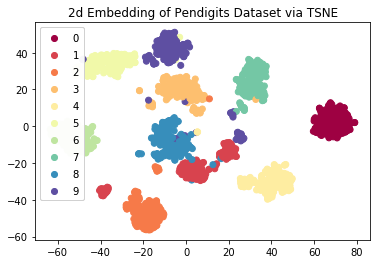

In [130]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=pendigits.target, cmap=plt.cm.Spectral)
legend = ax.legend(*scatter.legend_elements(), loc="upper left")
ax.add_artist(legend)
plt.title(f'2d Embedding of Pendigits Dataset via TSNE')
plt.savefig(f'output/tsne_pendigits_2d.png', dpi=300)

In [131]:
X_umap = umap.UMAP().fit_transform(pendigits.data)

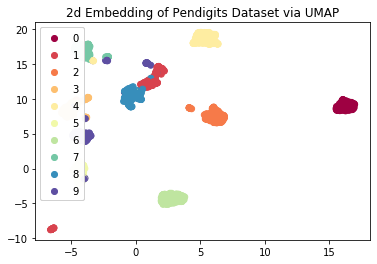

In [136]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1], c=pendigits.target, cmap=plt.cm.Spectral)
legend = ax.legend(*scatter.legend_elements(), loc="upper left")
ax.add_artist(legend)
plt.title(f'2d Embedding of Pendigits Dataset via UMAP')
plt.savefig(f'output/umap_pendigits_2d.png', dpi=300)

In [141]:
X_isomap = Isomap(n_neighbors=15).fit_transform(pendigits.data)

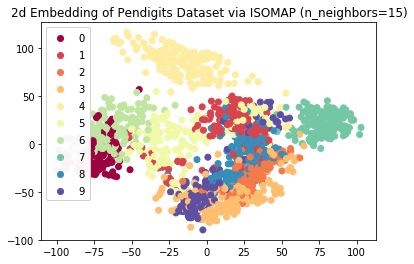

In [142]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X_isomap[:, 0], X_isomap[:, 1], c=pendigits.target, cmap=plt.cm.Spectral)
legend = ax.legend(*scatter.legend_elements(), loc="upper left")
ax.add_artist(legend)
plt.title(f'2d Embedding of Pendigits Dataset via ISOMAP (n_neighbors=15)')
plt.savefig(f'output/isomap_pendigits_2d.png', dpi=300)